The aim of this project was to make a price prediction of a house and also do determine the factors that affects the price of the house  using linear regression.

First,we import  the needed libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#The libraries and frames used include  numpy,pandas, matplotlib and seaborn. NumPy which stands for “numerical python” is  a python library for mathematical #operations. Pandas is a python library for reading and analyzing data from various sources including excel, Comma Separated Values (CSV) to mention a few. #Matplotlib  and  seaborn is a great tool or package for making visualizations of the data.

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
#From scikit learn  library  load the boston house-prices dataset

Before data exploratory ,it is important to know what the data looks like. An example  is the attribute and some characteristics of the dataset.

In [5]:
print(boston.DESCR)
#This describes the data set.It shows the number of rows(instances),and attributes (column)as well.

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

It can deduced that the prices of the houses that is shown by the variable MEDV(the meadian value of owner- occupied homes in 1000$ ) is our targert varaiable and the rest of the varaiables are feature variables which will also be included in the price prediction.

In [6]:
boston.feature_names# provides the names of features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
boston #returns the values of the dataset in a dictionary i.e the data,target,feature_names and DESCR

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
#load the data into a pandas data frame using pd.DataFrame

In [9]:
df.head()#print first 5 rows of the data to see how the data looks like.

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

From  the output above,it is observed that our target variable MEDV is not included in the output.Therefore we need to add a new a column with our target values and add it to the data frame.

In [10]:
df['MEDV'] = boston.target #adds a new a column,MEDV with our target values and add it to the data frame.

In [11]:
 df.head()#prints first 5 rows with our new column included.

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [12]:
 df.info()#to check the number of missing values for each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


From the ouput there are no missing values.

In [13]:
df.describe()#calculates some statistical data like percentile, mean and std of the numerical values of DataFrame

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

<b>Exploratory Data Analysis</b>
In this section we will use data visualization to understand the relationship 
between our target variable and the other feature variables.The visualisations
were done using seaborn.




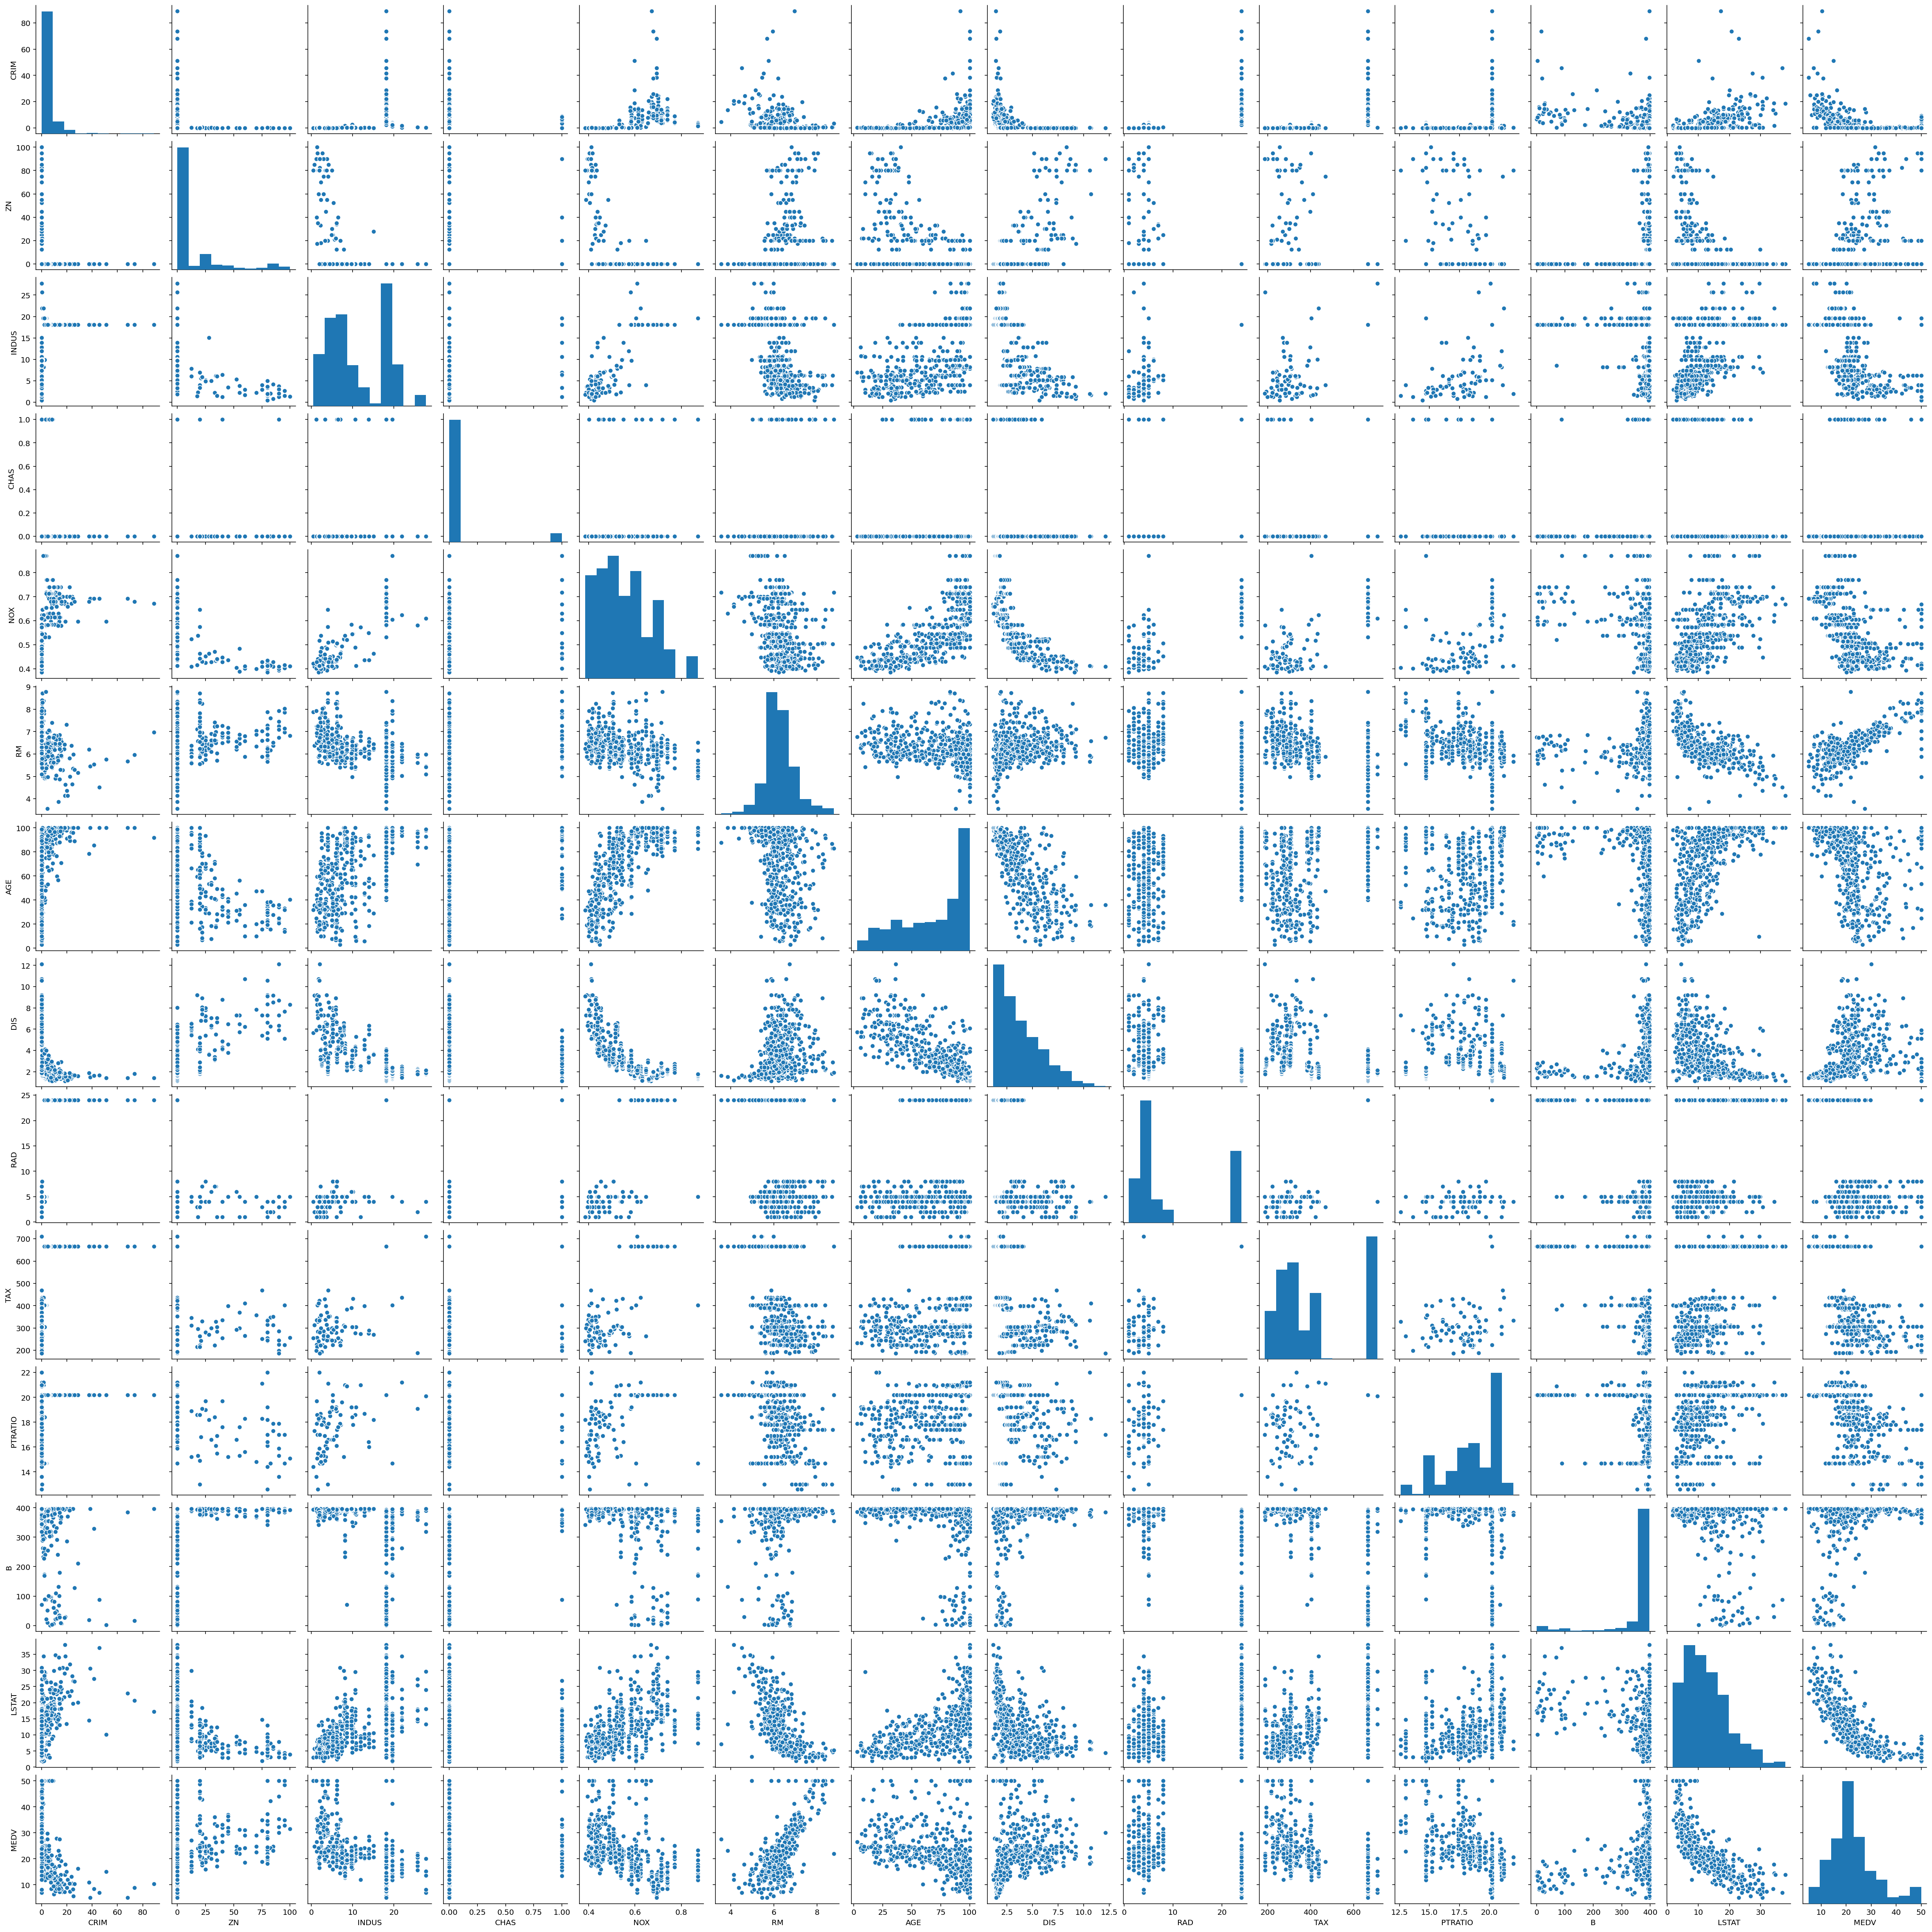

In [14]:
sns.pairplot(df)

Analysing the data visualisations,RM and MEDV have histograms that are close to normal distribution.Most of the tax distributions are arround 700.The histrogram od age is skewed to the left and LSTAT is skewed to the right.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


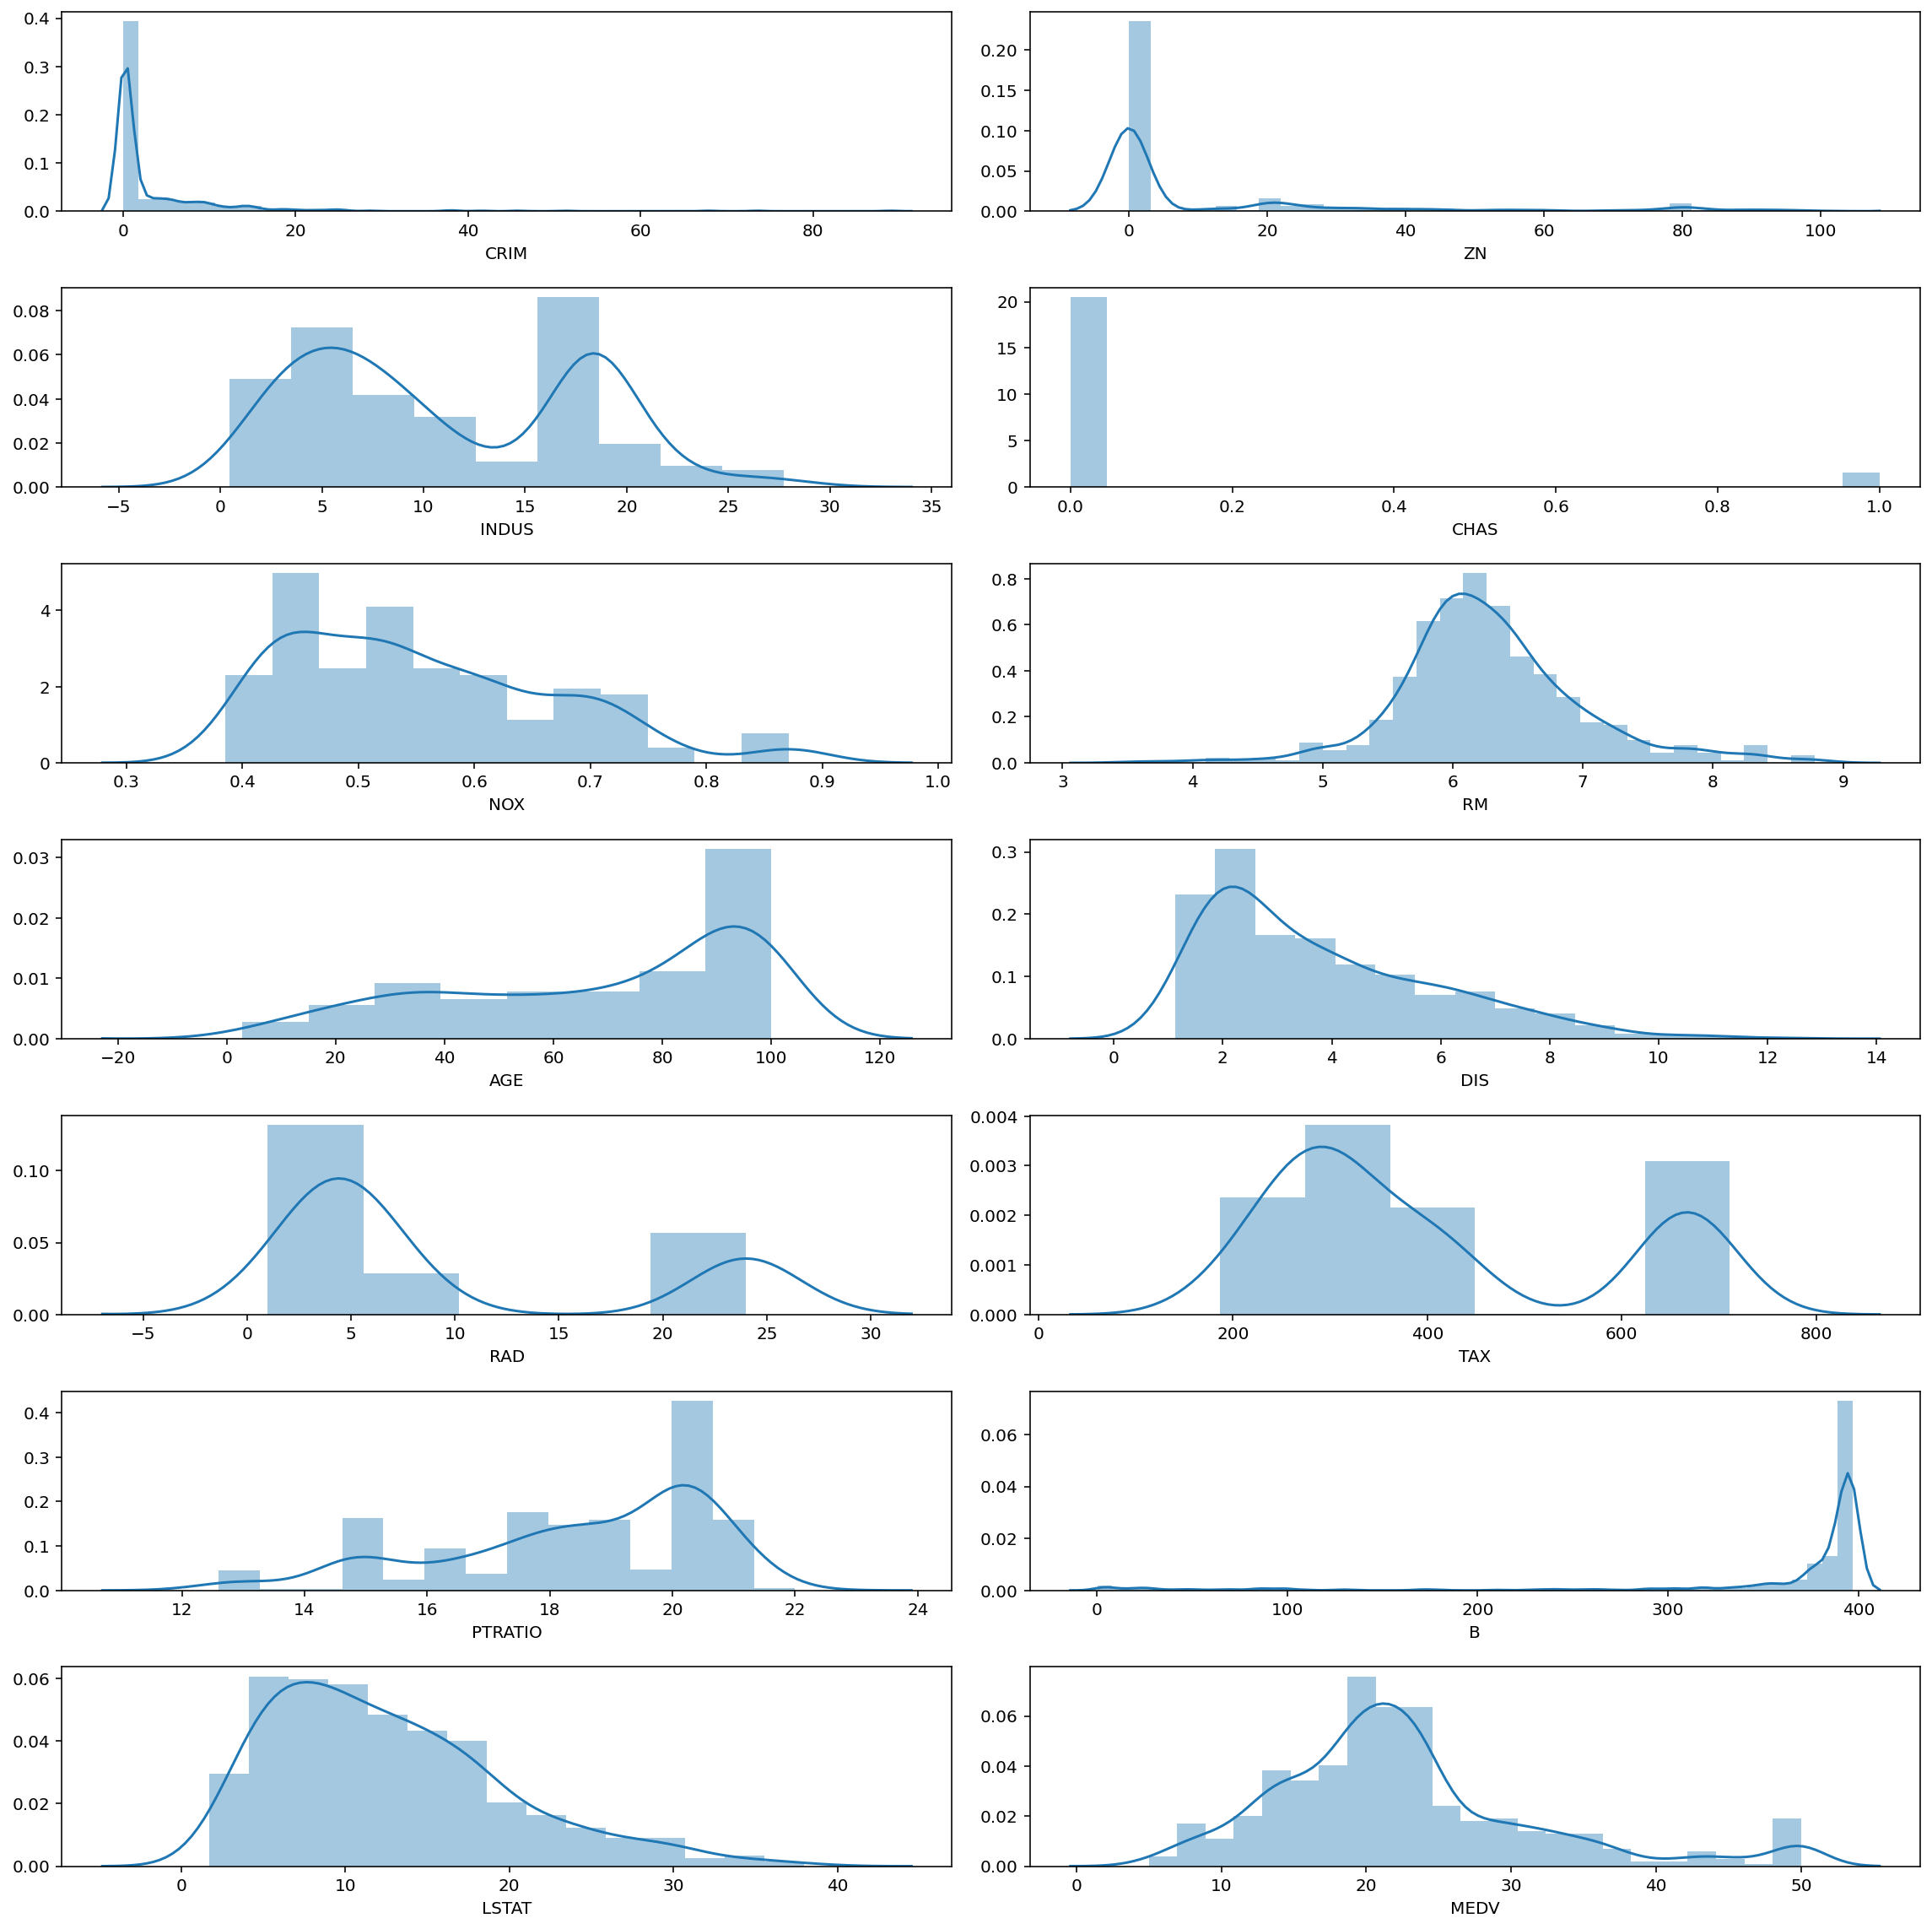

In [15]:
#observing the propability of distribution of each attribute using distribution plots.
rows = 7
cols = 2
fig, ax = plt.subplots(nrows= rows, ncols= cols, figsize = (16,16))
col = df.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()

The distribution of each attribute varriable is displayed.RM and MEDV  have histograms that are close to a normal distribution.However MEDV has some few outliers.

<AxesSubplot:>

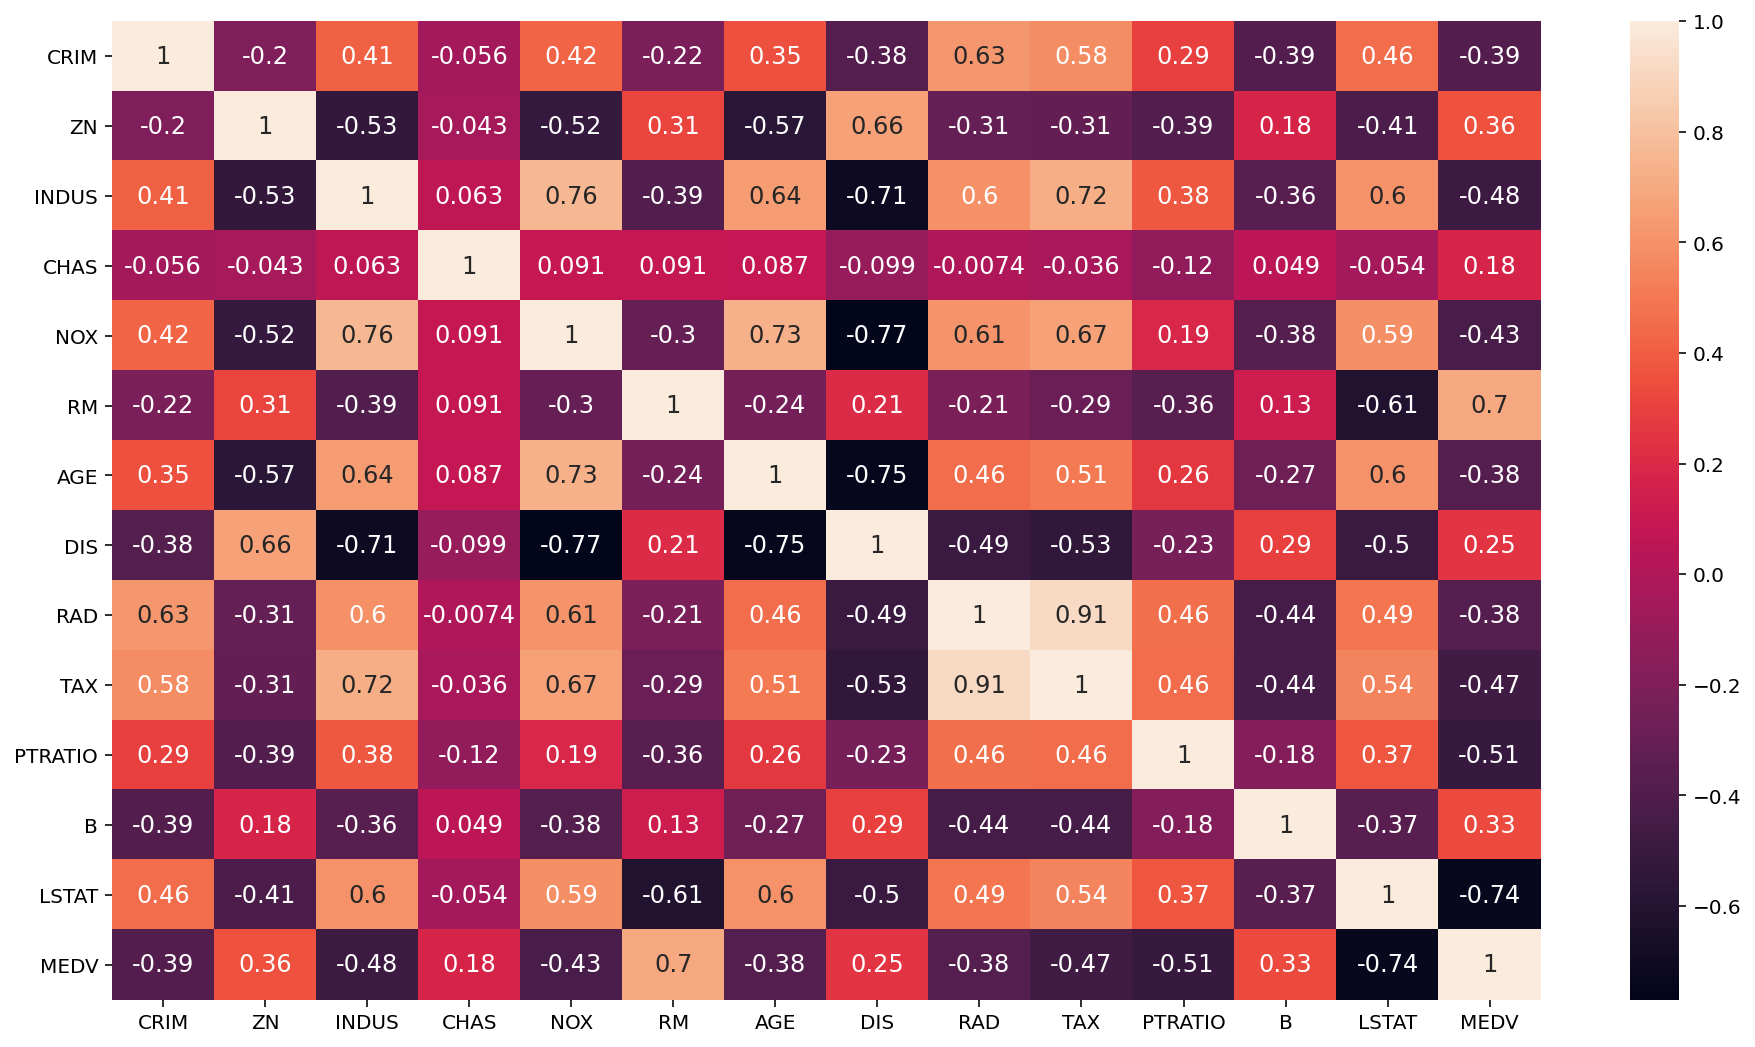

In [22]:
#a correlation matrix is created to  measure the linear relationships between the variables.
fig, ax = plt.subplots(figsize = (16, 9))
sns.heatmap(df.corr(), annot = True, annot_kws={'size': 12})

 Features which have a high correlation with our target variable MEDV are monitored.From the matrix, RM  has  a postive correlation with our target varaible with 0.7 whiles LSTAT has a high negative correlation with MEDV with -0.74.

In [23]:
#using a threshold as a filter to get high correlations  with MEDV to have a close to perfect model

def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

In [24]:
threshold = 0.4#correlation limit
corr_value = getCorrelatedFeature(df.corr()['MEDV'], threshold)

In [25]:
corr_value.index.values

array(['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype=object)

In [26]:
correlated_data = df[corr_value.index]
correlated_data.head() #see how new columns look like after the threshold filter

INDUS    NOX     RM    TAX  PTRATIO  LSTAT  MEDV
0   2.31  0.538  6.575  296.0     15.3   4.98  24.0
1   7.07  0.469  6.421  242.0     17.8   9.14  21.6
2   7.07  0.469  7.185  242.0     17.8   4.03  34.7
3   2.18  0.458  6.998  222.0     18.7   2.94  33.4
4   2.18  0.458  7.147  222.0     18.7   5.33  36.2

In [27]:
X = correlated_data.drop(labels=['MEDV'], axis = 1)
y = correlated_data['MEDV']

<b>Modelling using linear regression<b/>

In [28]:
# split the data into training and testing sets. train  with 67% of the samples and test with the 33%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=1)

In [29]:
# using scikit-learn’s LinearRegression to train our model on both the training and test sets
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [30]:
lm.fit(X_train,y_train)#training set passed to .fit method

LinearRegression()

In [31]:
predictions = lm.predict(X_test)

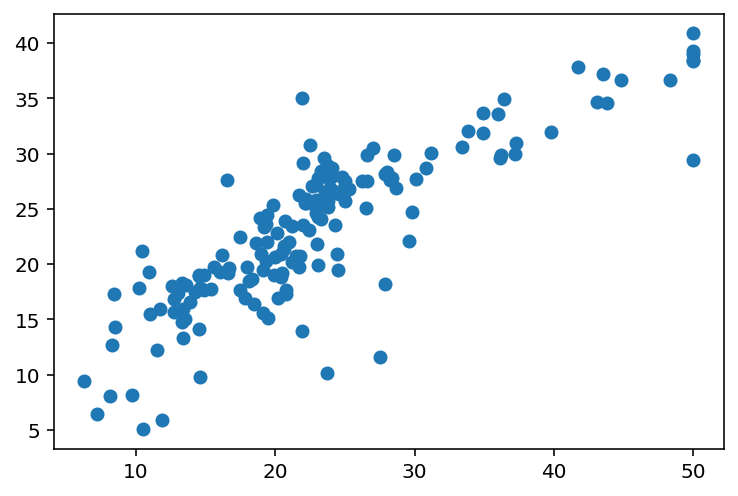

In [32]:
plt.scatter(y_test,predictions)

<AxesSubplot:xlabel='MEDV'>

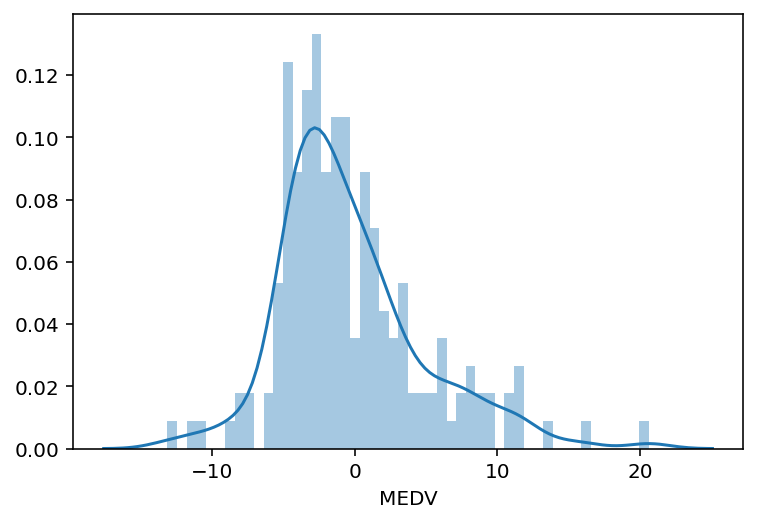

In [33]:
sns.distplot((y_test-predictions),bins=50)

In [34]:
lm.intercept_#Calculating interept

23.49923705354543

In [35]:
lm.coef_ #coeffiient of the linear equation returned in ana array

array([ 1.08016127e-01, -7.91996313e+00,  4.30011673e+00, -2.02636592e-04,
       -9.66142294e-01, -5.36384366e-01])

In [36]:
def lin_func(values, coefficients=lm.coef_, y_axis=lm.intercept_):
    return np.dot(values, coefficients) + y_axis

In [37]:
#testing and evaulating the model
from random import randint
for i in range(5):
    index = randint(0,len(df)-1)
    sample = df.iloc[index][corr_value.index.values].drop('MEDV')
    print(
'PREDICTION: ', round(lin_func(sample),2),
' // REAL: ',df.iloc[index]['MEDV'],
' // DIFFERENCE: ', round(round(lin_func(sample),2) - df.
iloc[index]['MEDV'],2)
)

PREDICTION:  25.13  // REAL:  28.1  // DIFFERENCE:  -2.97
PREDICTION:  21.01  // REAL:  50.0  // DIFFERENCE:  -28.99
PREDICTION:  23.04  // REAL:  25.0  // DIFFERENCE:  -1.96
PREDICTION:  32.52  // REAL:  33.1  // DIFFERENCE:  -0.58
PREDICTION:  22.25  // REAL:  22.6  // DIFFERENCE:  -0.35
